In [ ]:
import numpy
import math
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

array([[[  4, 126,   5],
        [  3, 125,   4],
        [  2, 126,   2],
        ...,
        [  0,  55,   4],
        [  0,  53,   4],
        [  3,  55,   9]],

       [[  4, 126,   5],
        [  3, 125,   4],
        [  2, 126,   2],
        ...,
        [  0,  53,   3],
        [  0,  53,   4],
        [  0,  52,   6]],

       [[  3, 125,   4],
        [  3, 125,   4],
        [  2, 126,   2],
        ...,
        [  0,  53,   3],
        [  0,  53,   4],
        [  0,  52,   6]],

       ...,

       [[121,  96,   6],
        [115,  90,   0],
        [115,  94,   3],
        ...,
        [  8,  21,  27],
        [ 12,  26,  37],
        [ 13,  28,  47]],

       [[116,  89,   0],
        [122,  97,   5],
        [113,  90,   0],
        ...,
        [  6,  21,  28],
        [ 18,  36,  48],
        [ 10,  28,  48]],

       [[124,  98,   5],
        [130, 105,  12],
        [121,  96,   4],
        ...,
        [  6,  23,  30],
        [ 21,  41,  52],
        [ 22,  40,  60]]], dtype=uint8)
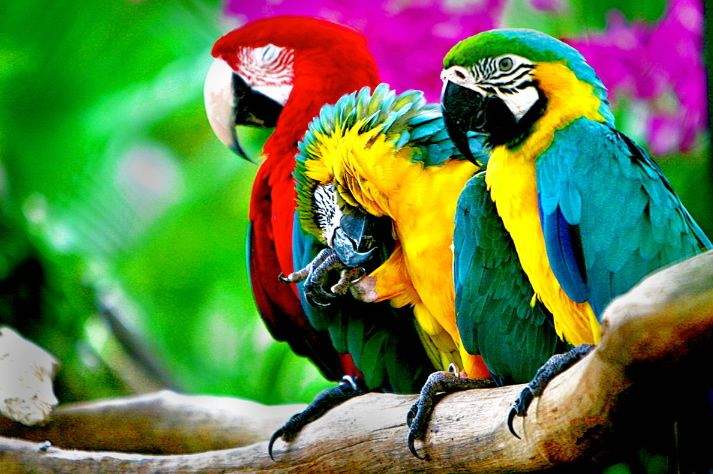

In [ ]:
image = imread('/content/parrots.jpg')
image

In [ ]:
image_float = img_as_float(image)

In [ ]:
r = image_float[:, :, 0].ravel()
g = image_float[:, :, 1].ravel()
b = image_float[:, :, 2].ravel()
rgb = numpy.transpose(numpy.vstack((r, g, b)))

In [ ]:
km = KMeans(init = 'k-means++', random_state=241)
km.fit(rgb)
c1 = km.labels_

In [ ]:
colors_avg = km.cluster_centers_
colors_avg

array([[0.47721045, 0.4329377 , 0.24335588],
       [0.75086997, 0.80448671, 0.75588564],
       [0.95220948, 0.82719787, 0.0449329 ],
       [0.09362961, 0.63868115, 0.06629249],
       [0.05877892, 0.11691201, 0.05052934],
       [0.17089981, 0.66289737, 0.54475599],
       [0.77784071, 0.0885502 , 0.69309523],
       [0.78672021, 0.0767471 , 0.02855172]])

In [ ]:
cl_image = numpy.reshape(c1, (-1, 713))
img_new = numpy.copy(image_float)

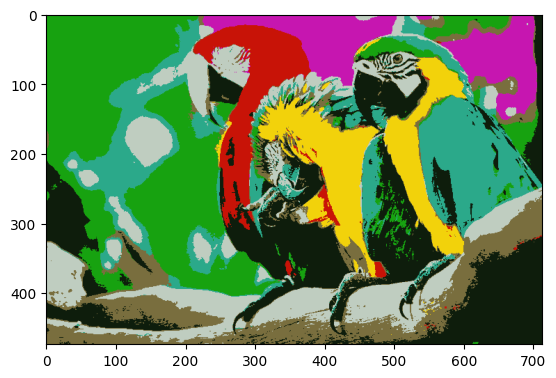

In [ ]:
for cluster in range(0, km.n_clusters):
  img_new[cl_image == cluster] = colors_avg[cluster]
  plt.imshow(img_new)
img_new_1 = numpy.copy(image_float)

[np.float64(0.4772104470096013), np.float64(0.4329376977217096), np.float64(0.2433558779324324)]
[np.float64(0.7508699715025732), np.float64(0.8044867137082615), np.float64(0.755885644445583)]
[np.float64(0.9522094785463466), np.float64(0.827197868788215), np.float64(0.044932897485950335)]
[np.float64(0.09362961170351214), np.float64(0.6386811521552024), np.float64(0.06629248702117346)]
[np.float64(0.05877891587435191), np.float64(0.11691201348021457), np.float64(0.05052933657954875)]
[np.float64(0.17089981082012687), np.float64(0.6628973730652263), np.float64(0.544755991755586)]
[np.float64(0.7778407067131096), np.float64(0.08855020394463753), np.float64(0.6930952286255521)]
[np.float64(0.786720213610968), np.float64(0.07674709523453882), np.float64(0.028551720988725326)]


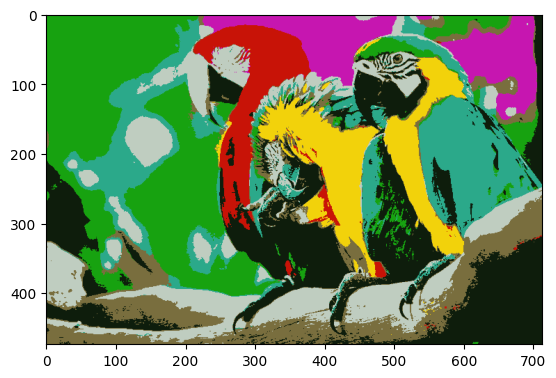

In [ ]:
for cluster in range(0, km.n_clusters):
    median_r = numpy.median(img_new[:, :, 0][cl_image == cluster])
    median_g = numpy.median(img_new[:, :, 1][cl_image == cluster])
    median_b = numpy.median(img_new[:, :, 2][cl_image == cluster])
    print([median_r, median_g, median_b])

    img_new_1[cl_image == cluster] = [median_r, median_g, median_b]
    plt.imshow(img_new_1)


In [ ]:
def PSNR(image1, image2):
    mse = numpy.mean((image1 - image2) ** 2)
    psnr = 10 * math.log10(numpy.max(image1) / mse)
    return psnr

print(PSNR(image_float, img_new))

18.38145499902781


1 9.837758895356927
2 12.11198102003225
3 13.173170346336413
4 14.321347926893553
5 15.092301639498322
6 16.572698813252707
7 17.671699011304746
8 18.38145499902781
9 19.14473388111866
10 19.535349363168383
11 20.083750359173422
12 20.57990677249334
13 21.06098609984107
14 21.36752025513099
15 21.6479998325704
16 21.88520677369761
17 22.154715374863923
18 22.379853243908432
19 22.52324883125138
20 22.722564502553915


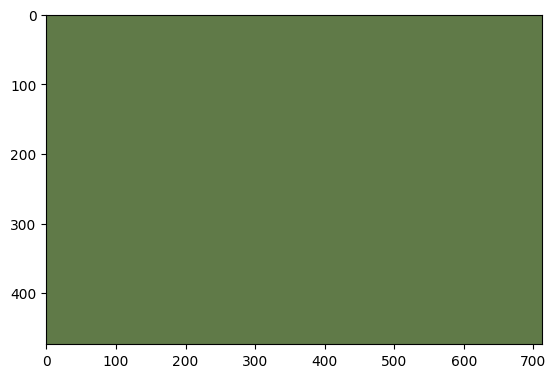

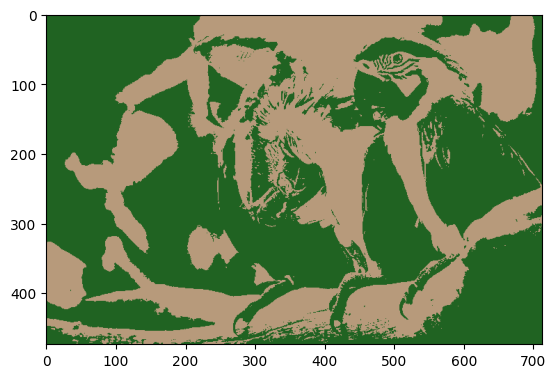

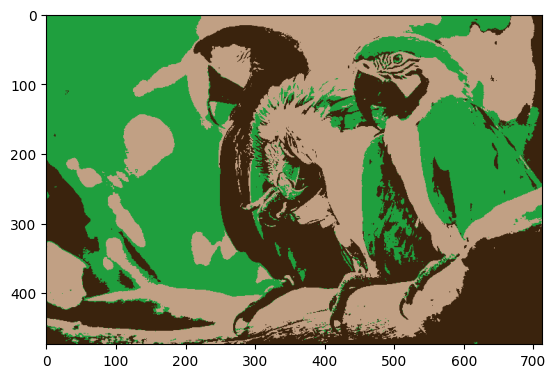

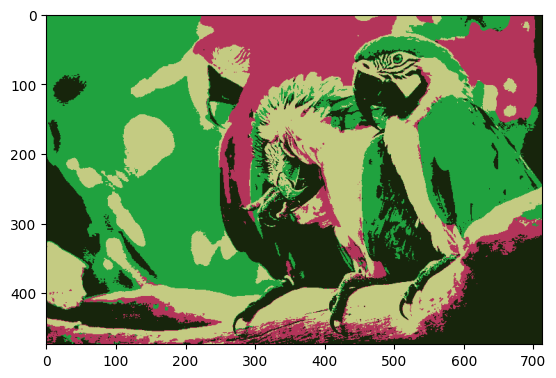

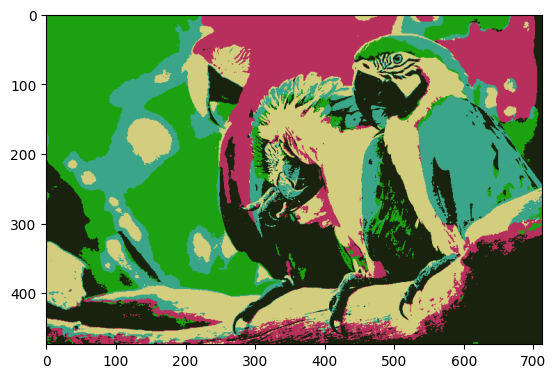

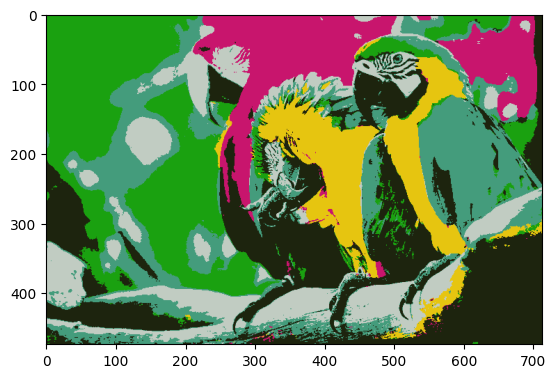

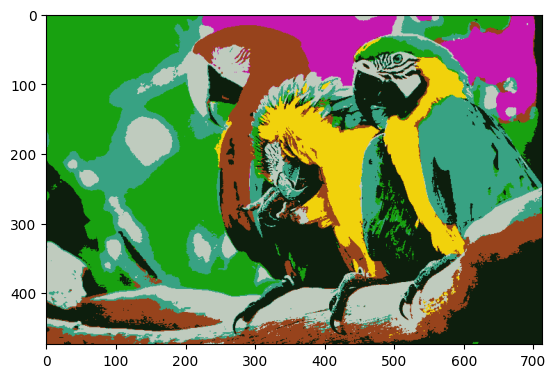

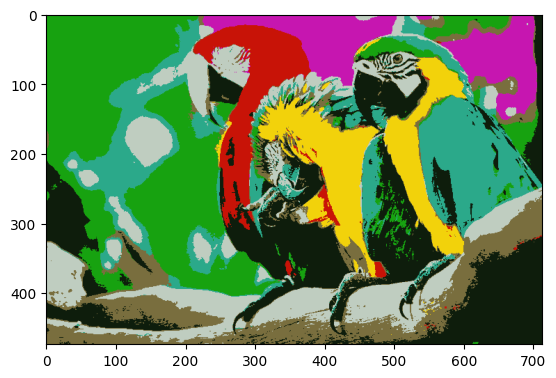

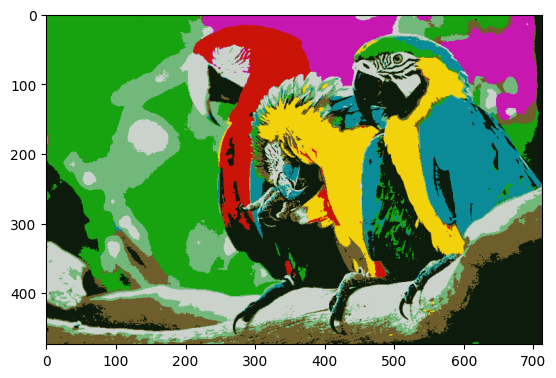

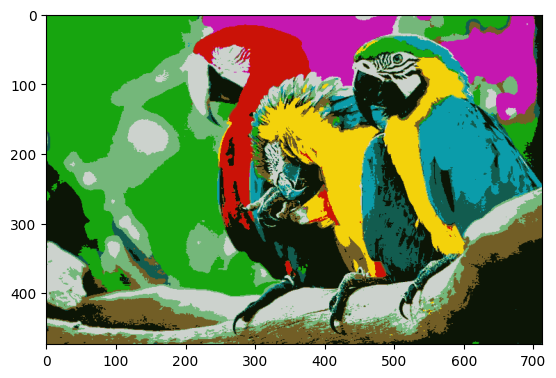

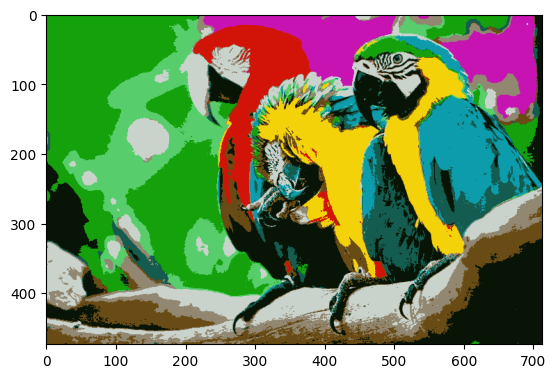

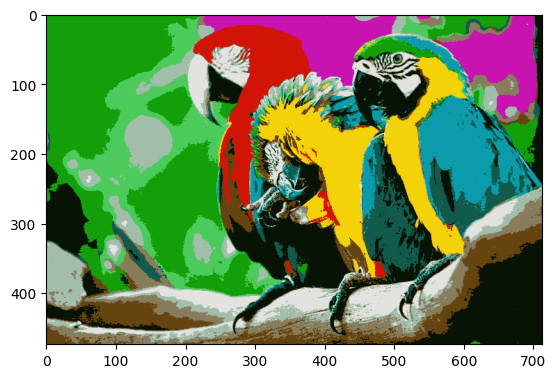

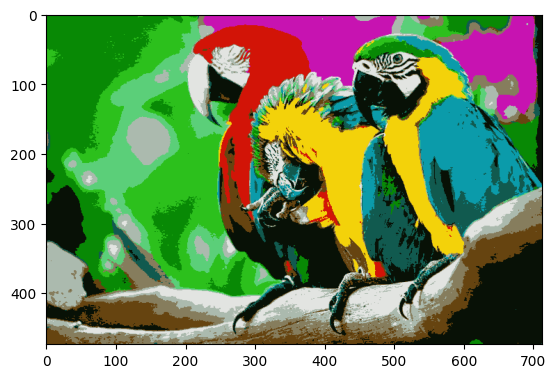

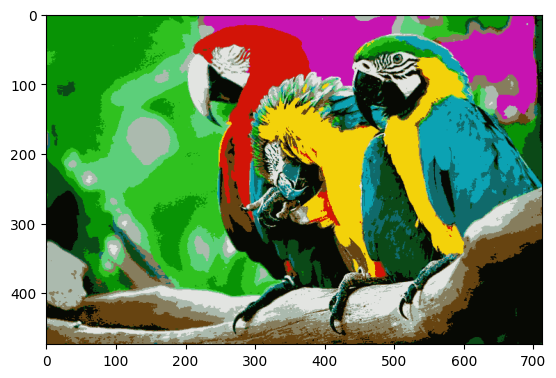

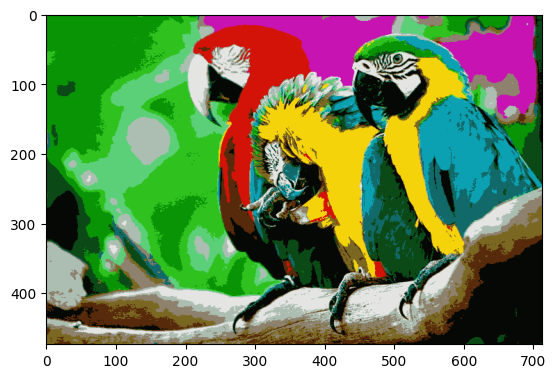

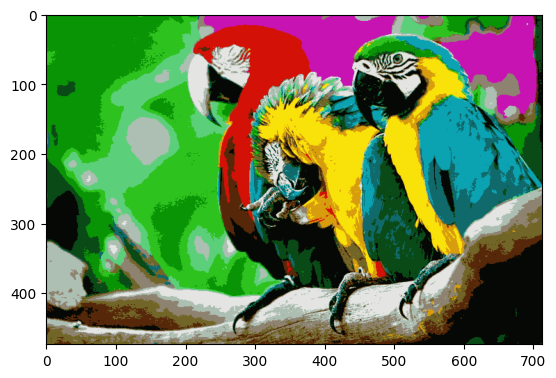

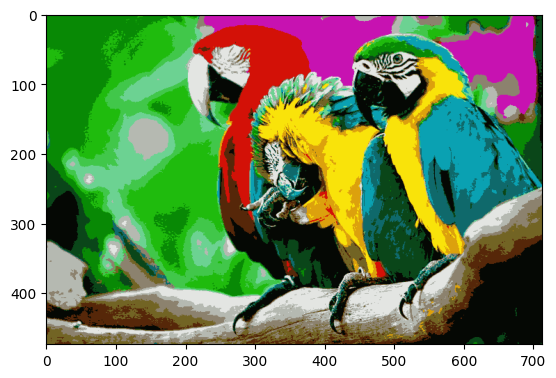

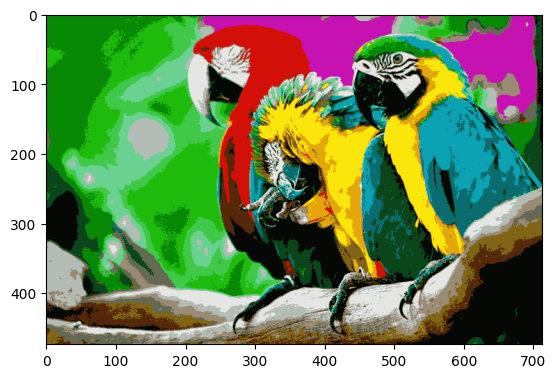

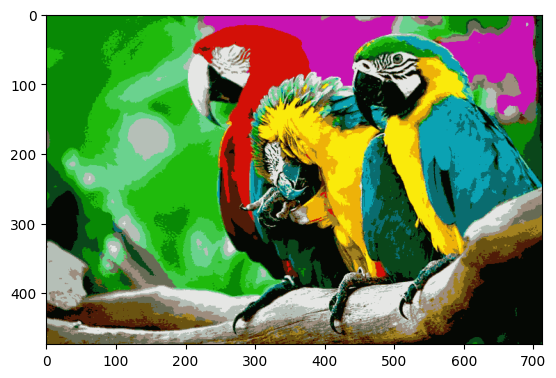

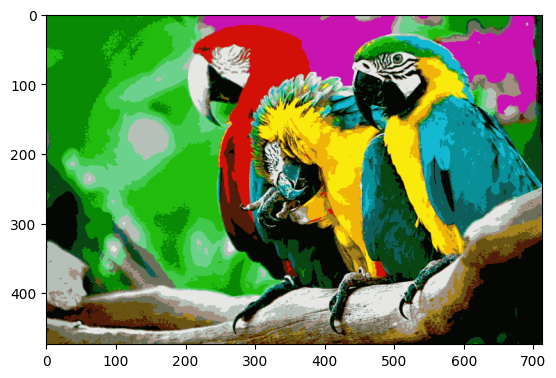

In [ ]:
for i in range(1, 21):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 241)
    km.fit(rgb)
    cl = km.labels_
    colors_avg = km.cluster_centers_
    cl_image = numpy.reshape(cl, (-1, 713))
    img_new = numpy.copy(image_float)
    for cluster in range(0, i):
        img_new[cl_image == cluster] = colors_avg[cluster]
    print (i, PSNR(image_float, img_new))
    plt.figure()
    plt.imshow(img_new)